# Otimização de Hiperparâmetros

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ds = load_iris(as_frame=True)
df = ds.frame
X = ds.data.values
y = ds.target.values

In [6]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

ss = StandardScaler()
ss.fit(X_treino)
X_treino = ss.transform(X_treino)
X_teste = ss.transform(X_teste)

In [21]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_treino, y_treino)
pred = knn.predict(X_teste)
accuracy_score(y_teste, pred)

0.9666666666666667

In [43]:

#NÃO FAZER ASSIM TA ERRADO FI
acuracias = []

ks = list(range(1, 30, 2))

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_treino, y_treino)
    pred = knn.predict(X_teste)
    acuracias.append(accuracy_score(y_teste, pred))
    
melhor_acuracia = max(acuracias)
melhor_k = ks[np.argmax(acuracias)]

print("Melhor k: %d com acuracia %.4f" % (melhor_k, melhor_acuracia))

Melhor k: 1 com acuracia 0.9667


In [44]:
def plot_knn_k_acuracias(ks, acuracias, titulo=''):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(ks, acuracias)
    ax.set_xticks(ks)
    ax.set_xlabel('k')
    ax.set_ylabel('Acuracia')
    ax.set_title("Acuracia no conjunto de %s" % (titulo))
    fig.tight_layout()
    plt.show()

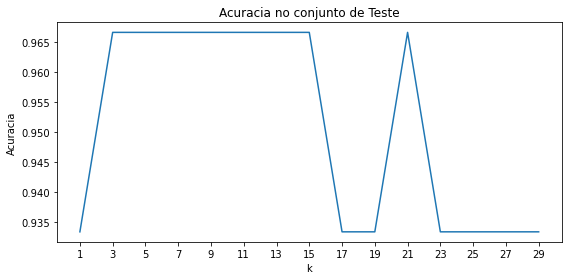

In [32]:
plot_knn_k_acuracias(ks, acuracias, "Teste")

# CONJUNTO DE VALIDAÇÃO

In [61]:
# 80% TREINO, 20% PARA TESTE 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# 80% TREINO, 20% PARA VALIDAÇÃO
X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, stratify=y_treino, random_state=1)

ss = StandardScaler()
ss.fit(X_treino)
X_treino = ss.transform(X_treino)
X_teste = ss.transform(X_teste)
X_val = ss.transform(X_val)

In [65]:

def selecionar_melhor_k(ks, X_treino, X_val, y_treino, y_val):
    # FAZER ASSIM TA certo FI
    acuracias_val = []
    
    knns = []
    
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_treino, y_treino)
        knns.append(knn)
        pred = knn.predict(X_val)
        acuracias_val.append(accuracy_score(y_val, pred))


    melhor_acuracia_val = max(acuracias_val)
    melhor_k_val = ks_val[np.argmax(acuracias_val)]
    melhor_knn = knns[np.argmax(acuracias_val)]
    
    return melhor_knn, melhor_k_val, melhor_acuracia_val

ks_val = list(range(1, 30, 2))

melhor_knn, elhor_k_val, melhor_acuracia_val = selecionar_melhor_k(ks_val, X_treino, X_val, y_treino, y_val)
print("Melhor k: %d com acuracia %.4f na validação" % (melhor_k_val, melhor_acuracia_val))

pred = melhor_knn.predict(X_teste)
print("Acuracia do teste: %.3f" % accuracy_score(y_teste, pred))



Melhor k: 7 com acuracia 0.9167 na validação
Acuracia do teste: 0.967


In [80]:
n_particoes = 100
rs = np.random.randint(0, n_particoes*100, n_particoes)

acuracias = []

for i in rs:
    # 80% TREINO, 20% PARA TESTE 
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)

    # 80% TREINO, 20% PARA VALIDAÇÃO
    X_treino, X_val, y_treino, y_val = train_test_split(X_treino, y_treino, test_size=0.2, stratify=y_treino, random_state=1)

    ss = StandardScaler()
    ss.fit(X_treino)
    X_treino = ss.transform(X_treino)
    X_teste = ss.transform(X_teste)
    X_val = ss.transform(X_val)
    
    melhor_knn,_,_ = selecionar_melhor_k(range(1, 30, 2), X_treino, X_val, y_treino, y_val)
    pred = melhor_knn.predict(X_teste)
    acuracias.append(accuracy_score(y_teste, pred))

In [82]:
print("n= %d, min= %.2f, max= %.2f, media= %.2f, stdev= %.2f"% (n_particoes, min(acuracias), max(acuracias), np.mean(acuracias), np.std(acuracias)))

n= 100, min= 0.83, max= 1.00, media= 0.94, stdev= 0.04


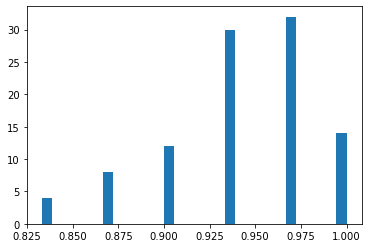

In [81]:
plt.hist(acuracias, bins=30)
plt.show()
